# Using PyTorch Tensors 

A PyTorch Tensor is basically the same as a numpy multidimensional array: it does not know
anything about deep learning or computational graphs or gradients, and is just
a generic n-dimensional array to be used for arbitrary numeric computation.

The biggest difference between a numpy array and a PyTorch Tensor is that
a PyTorch Tensor can run on either CPU or GPU. To run operations on the GPU,
just cast the Tensor to a cuda datatype.

(This example is adapted from: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html )

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## 1. Basic tensor matrix operations

In [2]:
# Simple matrix
m1 = torch.ones(3, 4)
print('Matrix m1: \n', m1)
print(m1.shape,"\n")

# Another (random) matrix
m2 = torch.rand(3, 4) # fill 3x4 matrix with uniform random numbers in [0,1] interval
print('Matrix m2: \n', m2)
print(m2.shape,"\n")

# Transpose of a matrix
print('Matrix m2^T: \n', m2.t())
print(m2.t().shape,"\n")

# Matrix operations
m3 = m1*m2      # Not a matrix multiplication ! Here each value in matrix m1 are multiplied by value m2
print('Matrix m3: \n', m3)
print(m3.shape,"\n")

# Matrix multiplication using torch.mm
m4 = m1.mm(m2.t())
print('Matrix m4: \n', m4)
print(m4.shape,"\n")

# Matrix multiplication using torch.matmul
m5 = m1.matmul(m2.t())
print('Matrix m5: \n', m5)
print(m5.shape,"\n")

# For matrix-vector multiplication there is also the possibility to use torch.mv
vec = torch.tensor([1.0,2.0,3.0])
print(torch.matmul(m5, vec))

Matrix m1: 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
torch.Size([3, 4]) 

Matrix m2: 
 tensor([[0.9018, 0.6470, 0.0100, 0.1147],
        [0.0276, 0.6368, 0.5552, 0.2980],
        [0.1298, 0.8836, 0.1151, 0.2505]])
torch.Size([3, 4]) 

Matrix m2^T: 
 tensor([[0.9018, 0.0276, 0.1298],
        [0.6470, 0.6368, 0.8836],
        [0.0100, 0.5552, 0.1151],
        [0.1147, 0.2980, 0.2505]])
torch.Size([4, 3]) 

Matrix m3: 
 tensor([[0.9018, 0.6470, 0.0100, 0.1147],
        [0.0276, 0.6368, 0.5552, 0.2980],
        [0.1298, 0.8836, 0.1151, 0.2505]])
torch.Size([3, 4]) 

Matrix m4: 
 tensor([[1.6735, 1.5175, 1.3790],
        [1.6735, 1.5175, 1.3790],
        [1.6735, 1.5175, 1.3790]])
torch.Size([3, 3]) 

Matrix m5: 
 tensor([[1.6735, 1.5175, 1.3790],
        [1.6735, 1.5175, 1.3790],
        [1.6735, 1.5175, 1.3790]])
torch.Size([3, 3]) 

tensor([8.8457, 8.8457, 8.8457])


## 2. More operations (power, sum, clamp, ...)

(See even more basic operations here: https://jhui.github.io/2018/02/09/PyTorch-Basic-operations/)

In [3]:
mat = torch.rand(3, 4)
print(mat)

# Takes the power of each element in input
print(mat.pow(3))

# Returns the sum of all elements in the input tensor
print(mat.sum())

# Clamp all elements in input into the range [ min, max ] and return a resulting tensor
print(mat.clamp(0.3,0.7))

tensor([[0.8976, 0.3103, 0.0421, 0.1054],
        [0.4499, 0.2230, 0.0612, 0.3155],
        [0.6405, 0.6003, 0.8997, 0.3351]])
tensor([[7.2315e-01, 2.9865e-02, 7.4505e-05, 1.1725e-03],
        [9.1056e-02, 1.1094e-02, 2.2971e-04, 3.1399e-02],
        [2.6275e-01, 2.1636e-01, 7.2834e-01, 3.7624e-02]])
tensor(4.8806)
tensor([[0.7000, 0.3103, 0.3000, 0.3000],
        [0.4499, 0.3000, 0.3000, 0.3155],
        [0.6405, 0.6003, 0.7000, 0.3351]])


## 3. Convertion to numpy array

In [4]:
# convertion PyTorch -> numpy
a = torch.randn(5)
b = a.numpy()

# convertion numpy -> PyTorch
c = torch.from_numpy(b)

print(a)
print(b)
print(c)

tensor([ 0.9498, -0.0658,  0.6277,  1.1567, -0.1517])
[ 0.9498094  -0.06578904  0.6276967   1.1567378  -0.15165827]
tensor([ 0.9498, -0.0658,  0.6277,  1.1567, -0.1517])


## 4. Example using automatic differentiation (Autograd)

A PyTorch Tensor represents a node in a computational graph. If ``x`` is a
Tensor that has ``x.requires_grad=True`` then ``x.grad`` is another Tensor
holding the gradient of ``x`` with respect to some scalar value.

Example for simple regression:

In [5]:
# Simple regression example
x = [1., 2., 3., 4., 5.]           # data
y = [10., 20., 30., 40., 50.]      # target values

# Gradients will be calculated w.r.t this tensors (has "requires_grad=True")
w = torch.tensor([1.],requires_grad=True)

# Number of loops on all sample
for epoch in range(5):
    
    # Loop on data events and target values
    for x_i, y_i in zip(x, y):
        
        # compute predicted target variable
        y_pred = x_i * w
                
        # compute Mean Squared Error (MSE)
        loss = (y_pred - y_i) ** 2
        
        # With PyTorch we can automatically compute the derivative of the loss 
        # w.r.t. the tensors that have requires_grad set to True (i.e. weights).
        # compute gradients
        loss.backward()
                        
        print('\t x=%.1f y=%.1f, w=%.2f, dloss/dw=%.1f' % (x_i, y_i, w.data, w.grad.data))
                
        # make one step towards the local minima, with learning rate 0.01
        w.data -= 0.01 * w.grad.data
        
        # clear gradients after updating weights
        w.grad.data.zero_()
        
    print('Loss at epoch #%d: %.6f \n' % (epoch+1, loss.data[0]))

print('Final: w = %.4f' % (w.data))


	 x=1.0 y=10.0, w=1.00, dloss/dw=-18.0
	 x=2.0 y=20.0, w=1.18, dloss/dw=-70.6
	 x=3.0 y=30.0, w=1.89, dloss/dw=-146.1
	 x=4.0 y=40.0, w=3.35, dloss/dw=-212.9
	 x=5.0 y=50.0, w=5.48, dloss/dw=-226.2
Loss at epoch #1: 511.797760 

	 x=1.0 y=10.0, w=7.74, dloss/dw=-4.5
	 x=2.0 y=20.0, w=7.78, dloss/dw=-17.7
	 x=3.0 y=30.0, w=7.96, dloss/dw=-36.7
	 x=4.0 y=40.0, w=8.33, dloss/dw=-53.5
	 x=5.0 y=50.0, w=8.86, dloss/dw=-56.9
Loss at epoch #2: 32.337894 

	 x=1.0 y=10.0, w=9.43, dloss/dw=-1.1
	 x=2.0 y=20.0, w=9.44, dloss/dw=-4.5
	 x=3.0 y=30.0, w=9.49, dloss/dw=-9.2
	 x=4.0 y=40.0, w=9.58, dloss/dw=-13.5
	 x=5.0 y=50.0, w=9.71, dloss/dw=-14.3
Loss at epoch #3: 2.043265 

	 x=1.0 y=10.0, w=9.86, dloss/dw=-0.3
	 x=2.0 y=20.0, w=9.86, dloss/dw=-1.1
	 x=3.0 y=30.0, w=9.87, dloss/dw=-2.3
	 x=4.0 y=40.0, w=9.89, dloss/dw=-3.4
	 x=5.0 y=50.0, w=9.93, dloss/dw=-3.6
Loss at epoch #4: 0.129104 

	 x=1.0 y=10.0, w=9.96, dloss/dw=-0.1
	 x=2.0 y=20.0, w=9.96, dloss/dw=-0.3
	 x=3.0 y=30.0, w=9.97, dloss/d

## 5. Exercice: modify the previous example
Now we have the following data. How should be modified the above code ? How many epochs are needed for convergence ?


In [6]:
# Now we have the following data. How should be modified the above code 
x = [1., 2., 3., 4., 5., 6., 7., 8., 9., 10.]           # data
y = [15., 25., 35., 45., 55., 65., 75., 85., 95., 105.] # target values

# Gradients will be calculated w.r.t these two tensors (have "requires_grad=True")
w = torch.tensor([1.],requires_grad=True)
b = torch.tensor([0.],requires_grad=True)

for epoch in range(100):
    
    for x_i, y_i in zip(x, y):
        
        # compute predicted target variable
        y_pred = x_i * w + b
                
        # compute Mean Squared Error (MSE)
        loss = (y_pred - y_i) ** 2
        
        # With PyTorch we can automatically compute the derivative of the loss 
        # w.r.t. the tensors that have requires_grad set to True (i.e. w and b).
        # compute gradients
        loss.backward()
                        
        print('\t x=%.1f y=%.1f, w=%.2f, b=%.2f, dloss/dw=%.1f, dloss/db=%.1f' % (x_i, y_i, w.data, b.data, w.grad.data, b.grad.data))
                
        # make one step towards the local minima, with learning rate 0.01
        w.data -= 0.01 * w.grad.data
        b.data -= 0.01 * b.grad.data
        
        # clear gradients after updating weights
        w.grad.data.zero_()
        b.grad.data.zero_()
        
    print('Loss at epoch #%d: %.6f \n' % (epoch+1, loss.data[0]))

print('Final: w = %.4f, b = %4f' % (w.data, b.data))


	 x=1.0 y=15.0, w=1.00, b=0.00, dloss/dw=-28.0, dloss/db=-28.0
	 x=2.0 y=25.0, w=1.28, b=0.28, dloss/dw=-88.6, dloss/db=-44.3
	 x=3.0 y=35.0, w=2.17, b=0.72, dloss/dw=-166.7, dloss/db=-55.6
	 x=4.0 y=45.0, w=3.83, b=1.28, dloss/dw=-227.1, dloss/db=-56.8
	 x=5.0 y=55.0, w=6.10, b=1.85, dloss/dw=-226.3, dloss/db=-45.3
	 x=6.0 y=65.0, w=8.37, b=2.30, dloss/dw=-150.0, dloss/db=-25.0
	 x=7.0 y=75.0, w=9.87, b=2.55, dloss/dw=-47.3, dloss/db=-6.8
	 x=8.0 y=85.0, w=10.34, b=2.62, dloss/dw=5.4, dloss/db=0.7
	 x=9.0 y=95.0, w=10.29, b=2.61, dloss/dw=3.3, dloss/db=0.4
	 x=10.0 y=105.0, w=10.25, b=2.61, dloss/dw=2.7, dloss/db=0.3
Loss at epoch #1: 0.018289 

	 x=1.0 y=15.0, w=10.23, b=2.60, dloss/dw=-4.3, dloss/db=-4.3
	 x=2.0 y=25.0, w=10.27, b=2.65, dloss/dw=-7.3, dloss/db=-3.6
	 x=3.0 y=35.0, w=10.34, b=2.68, dloss/dw=-7.7, dloss/db=-2.6
	 x=4.0 y=45.0, w=10.42, b=2.71, dloss/dw=-4.9, dloss/db=-1.2
	 x=5.0 y=55.0, w=10.47, b=2.72, dloss/dw=0.6, dloss/db=0.1
	 x=6.0 y=65.0, w=10.46, b=2.72, dlos


## 6. Simple Neural Network implementation

We consider a fully-connected ReLU network with one hidden layer of 100 neurons and no biases, trained to predict y from x by minimizing squared Euclidean distance.

The model that we want to build has the following structure:
$$\hat{y}(x) = \text{relu}(x.w_1).w_2,$$
where $x$ and $y$ are the input and output features (of dimension 1000 and 10, respectively). N=64 examples are considered for the training. Here the relu activation function is used and $w_1$ and $w_2$ are weight matrices.

This implementation computes the forward pass using operations on PyTorch Tensors, and uses PyTorch autograd to compute gradients.

### Initialization

In [7]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU (if you have a GPU !)

# Data dimensions
N = 64      # N: input batch size
D_in = 1000 # D_in: input dimension
H = 100     # H: hidden layer dimension;
D_out = 10  # D_out: output dimension

# NN settings
learning_rate = 1e-6
N_epochs = 500

# Create random Tensors to hold input and outputs.
# Default setting requires_grad=False indicates that we do not need to compute gradients
# with respect to these Tensors during the backward pass.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Create random Tensors for weights.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

### Train network using pytorch

Implement the following:
- The model: $$\hat{y}(x) = \text{relu}(x.w_1).w_2,$$
- The loss function: $$\sum_{i=1}^{i=64}(\hat{y}(x_i) - y_i)^2$$
- The gradient and the weight update
- Train for N_epochs
- Validation: at each epoch test the model on an independently created sample (see below)
- Store the loss values of the train and validation sample for each epoch
- Do the training and validation steps for N_epochs
- Finally, plot the evolution of cost as a function of the number of iterations.

Conclude on the generalization of the model.

In [8]:
# Independent validation sample, on which the model is tested at each epoch
x_val = torch.randn(N, D_in, device=device, dtype=dtype)
y_val = torch.randn(N, D_out, device=device, dtype=dtype)

In [9]:
# Counters
cost=[]
counter=[]
cost_val=[]

for t in range(N_epochs):
    # Forward pass: compute predicted y using operations on Tensors; these
    # are exactly the same operations we used to compute the forward pass using
    # Tensors, but we do not need to keep references to intermediate values since
    # we are not implementing the backward pass by hand.
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    
    # alternativelt you can use the built-in pytorch relu function
    # y_pred = torch.relu(x.mm(w1)).mm(w2)

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the a scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    #print(t, loss.item())
    cost.append(loss.item())
    counter.append(t)

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()
    
    # Calculate the loss on the validation sample (not used for the calculation of the weights)
    y_pred_val = x_val.mm(w1).clamp(min=0).mm(w2)
    loss_validation = (y_pred_val - y_val).pow(2).sum()
    cost_val.append(loss_validation.item())
    
    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    # An alternative way is to operate on weight.data and weight.grad.data.
    # Recall that tensor.data gives a tensor that shares the storage with
    # tensor, but doesn't track history.
    # You can also use torch.optim.SGD to achieve this.
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()

### Plot the model performance

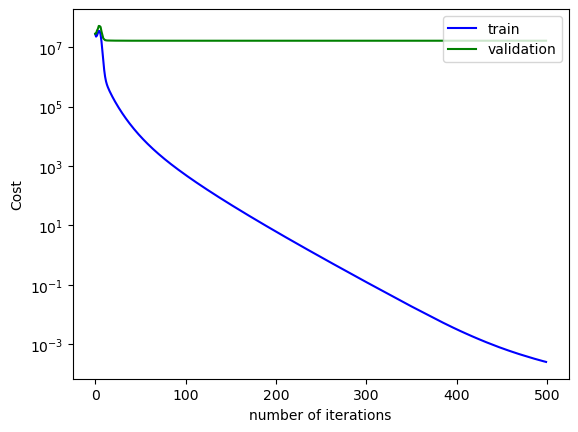

In [10]:
fig = plt.figure()
plt.plot(counter, cost, color='blue', label='train')
plt.plot(counter, cost_val, color='green',label='validation')
plt.legend(loc='upper right')
plt.xlabel('number of iterations')
plt.ylabel('Cost')
plt.yscale('log')